In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

# 连续变量直方图

In [4]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

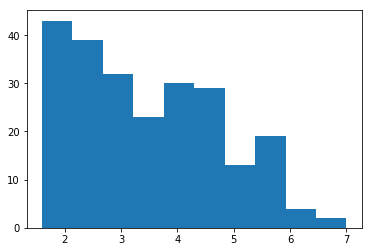

In [18]:
plt.hist(df.displ,
#        bins=5,
#         density=True,
#         cumulative=True,
#         histtype='step',
#         orientation='horizontal'
         align='mid'
        )
plt.show()

In [55]:
df_agg = df.loc[:,['displ','class']].groupby('class')
vals = [df0['displ'].values.tolist() for i,df0 in df_agg]

In [56]:
for i,df0 in df_agg:
    print(df0)

    displ    class
23    5.7  2seater
24    5.7  2seater
25    6.2  2seater
26    6.2  2seater
27    7.0  2seater
     displ    class
0      1.8  compact
1      1.8  compact
2      2.0  compact
3      2.0  compact
4      2.8  compact
5      2.8  compact
6      3.1  compact
7      1.8  compact
8      1.8  compact
9      2.0  compact
10     2.0  compact
11     2.8  compact
12     2.8  compact
13     3.1  compact
14     3.1  compact
141    2.4  compact
142    2.4  compact
169    2.5  compact
170    2.5  compact
171    2.5  compact
172    2.5  compact
186    2.2  compact
187    2.2  compact
188    2.4  compact
189    2.4  compact
190    3.0  compact
191    3.0  compact
192    3.3  compact
193    1.8  compact
194    1.8  compact
195    1.8  compact
196    1.8  compact
197    1.8  compact
207    2.0  compact
208    2.0  compact
209    2.0  compact
210    2.0  compact
211    2.8  compact
212    1.9  compact
213    2.0  compact
214    2.0  compact
215    2.0  compact
216    2.0  compact
217   

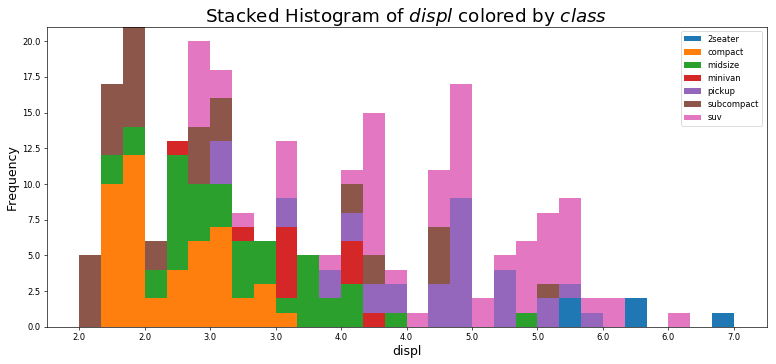

In [43]:
fig = plt.figure(figsize=(12,5),dpi=60)
ax = fig.add_axes((0,0,1.0,1.0))

# 堆叠直方图
n,bins,patches = plt.hist(vals,bins=30,stacked=True)
# set title
ax.set_title('Stacked Histogram of $displ$ colored by $class$',
             fontsize=22)
# set label
ax.set_xlabel('displ',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)

# set ticks
ax.xaxis.set_ticks(bins[::3])
ax.xaxis.set_ticklabels([round(bin) for bin in bins[::3]])

ax.legend(np.unique(df['class']))
plt.show()

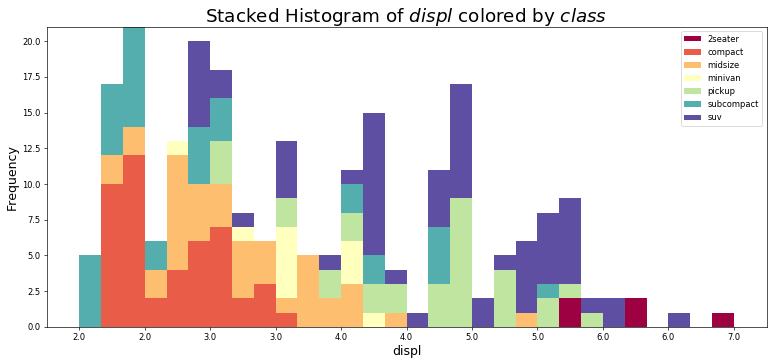

In [45]:
fig = plt.figure(figsize=(12,5),dpi=60)
ax = fig.add_axes((0,0,1.0,1.0))

# 堆叠直方图
colors = [plt.cm.Spectral(i/(float(len(vals)-1)))  for i in range(len(vals))]
n,bins,patches = plt.hist(vals,bins=30,stacked=True,color=colors)

# set title
ax.set_title('Stacked Histogram of $displ$ colored by $class$',
             fontsize=22)
# set label
ax.set_xlabel('displ',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)

# set ticks
ax.xaxis.set_ticks(bins[::3])
ax.xaxis.set_ticklabels()

ax.legend(np.unique(df['class']))
plt.show()

# 分类变量直方图

In [46]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [64]:
x_var = 'manufacturer'
groupby_var = 'class'
df_agg = df.loc[:,[x_var,groupby_var]].groupby(groupby_var)
vals = [df0[x_var].values.tolist() for i,df0 in df_agg]

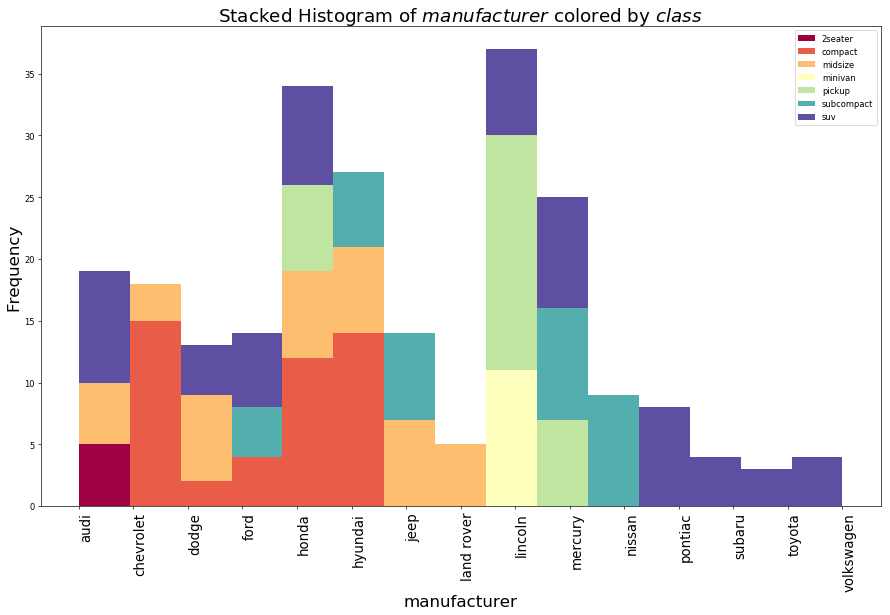

In [82]:
fig = plt.figure(figsize=(14,8),dpi=60)
ax = fig.add_axes((0,0,1.0,1.0))

# draw
colors = [plt.cm.Spectral(i/float(len(vals)-1)) 
          for i in range(len(vals))]
n, bins, patches = ax.hist(vals, df['manufacturer'].unique().__len__(),
                          stacked=True,
                          density=False, color=colors)

# legend set
ax.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})


# set title
ax.set_title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$",fontsize=22)

# set label
ax.set_xlabel(x_var, fontsize=20)
ax.set_ylabel("Frequency", fontsize=20)

# set xaxis tick
ax.xaxis.set_ticklabels(np.unique(df[x_var]).tolist(),
                        rotation=90,ha='left',fontsize=16)
plt.show()


# 密度图

## demo

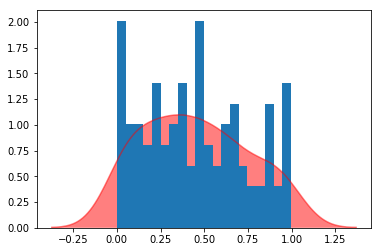

In [98]:
x = np.random.rand(100)
sns.kdeplot(x,
            shade=True,
            color='r',
           vertical=False,
            alpha=0.5)
plt.hist(x,bins=20,density=True)
plt.show()

## exercise

In [99]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [103]:
c4 = df.loc[df.cyl==4,'cty'].values
c5 = df.loc[df.cyl==5,'cty'].values
c6 = df.loc[df.cyl==6,'cty'].values
c8 = df.loc[df.cyl==8,'cty'].values

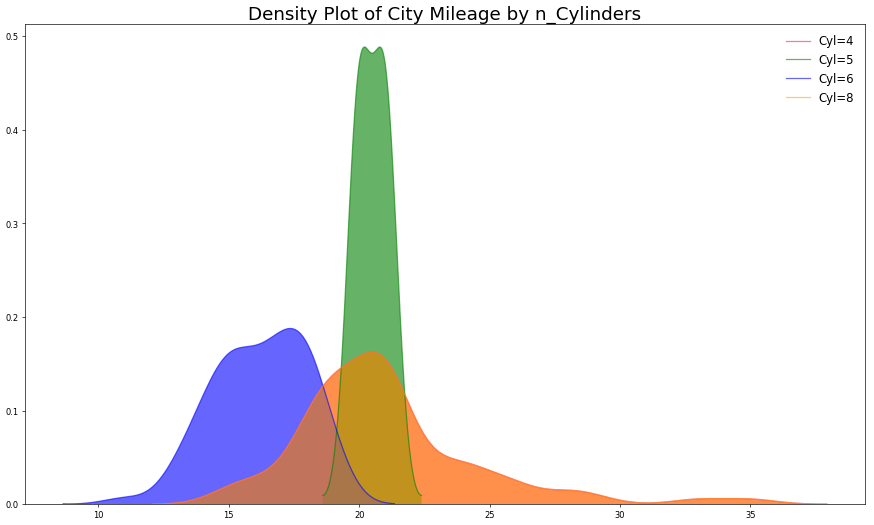

In [110]:
fig = plt.figure(figsize=(14,8),dpi=60)
ax = fig.add_axes((0,0,1.0,1.0))

sns.kdeplot(c4, shade=True, color='deeppink', alpha=.6, label='Cyl=4')
sns.kdeplot(c5, shade=True, color='g', alpha=.6, label='Cyl=5')
sns.kdeplot(c6, shade=True, color='b', alpha=.6, label='Cyl=6')
sns.kdeplot(c4, shade=True, color='orange', alpha=.6, label='Cyl=8')

ax.set_title('Density Plot of City Mileage by n_Cylinders',
            fontsize=22)

# frameon 设置legend的bbox不显示
ax.legend(fontsize=14,frameon=False)
plt.show()

# 直方密度曲线图

## demo

In [111]:
x = np.random.rand(100)

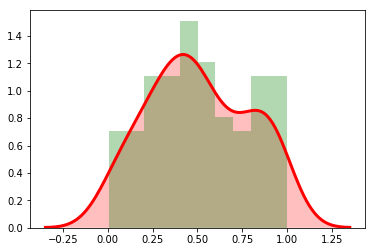

In [119]:
sns.distplot(x, 
             bins=10,
            hist=True,
            kde=True,
            hist_kws={'color':'g','histtype':'bar','alpha':.3},
            kde_kws={'shade':True,'color':'r','linewidth':3})
plt.show()

## exercise

In [120]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [121]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [131]:
class_ = set(df['class'].values)
class_ = ['compact','suv','minivan']
data_ = []
for c in class_:
    data_.append(df.loc[df['class']==c,'cty'].values)

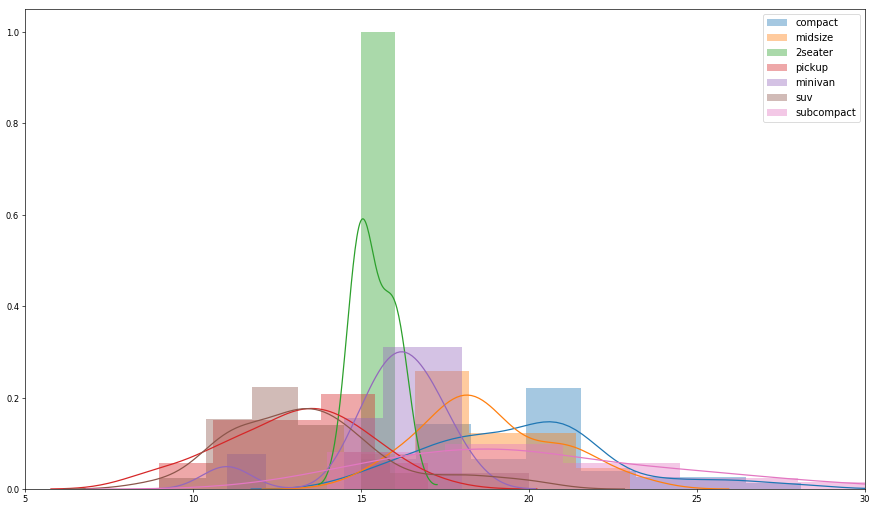

In [144]:
fig = plt.figure(figsize=(14,8),dpi=60)
ax = fig.add_axes((0,0,1.0,1.0))


for data,c in zip(data_,class_):
    sns.distplot(data,label=c)

ax.legend(class_,fontsize=12)

ax.set_xlim(5,30)
plt.show()

In [157]:
class_ = ['compact','suv','minivan']
data_ = []
for c in class_:
    data_.append(df.loc[df['class']==c,'cty'].values)

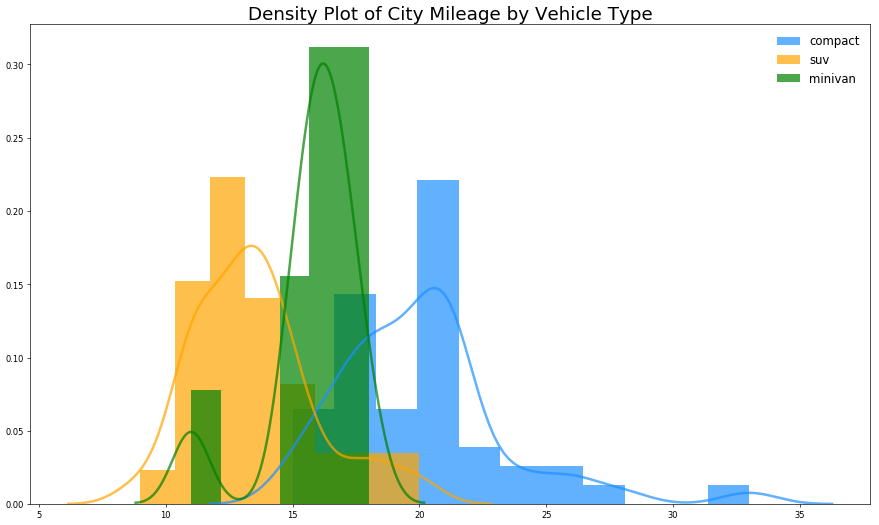

In [167]:
fig = plt.figure(figsize=(14,8),dpi=60)
ax = fig.add_axes((0,0,1.0,1.0))



sns.distplot(data_[0],label=class_[0],color='dodgerblue',
            hist_kws={'alpha':.7},
            kde_kws={'linewidth':3,'alpha':.7})
sns.distplot(data_[1],label=class_[1],color='orange',
            hist_kws={'alpha':.7},
            kde_kws={'linewidth':3,'alpha':.7})
sns.distplot(data_[2],label=class_[2],color='g',
            hist_kws={'alpha':.7},
            kde_kws={'linewidth':3,'alpha':.7})

ax.legend(class_,fontsize=14,frameon=False)

plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.show()

# Joyplot

In [168]:
import joypy

In [170]:
iris = sns.load_dataset('iris')

In [171]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


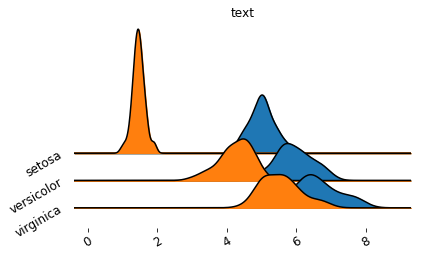

In [191]:
joypy.joyplot(iris,
             column=['sepal_length','petal_length'],
              by='species',
              xlabelsize=12,
              ylabelsize=12,
#               ylim='own',
#               grid=True,
#               fill= False,
#               hist=True,
              xrot=30,
              yrot=30,
              overlap=3,
              title='text'
             )
plt.show()

## exercise

In [192]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

<Figure size 840x480 with 0 Axes>

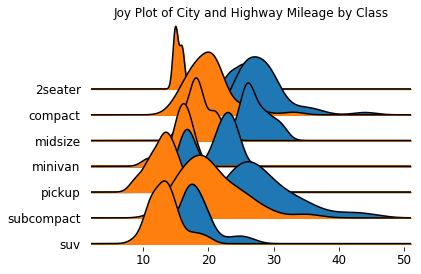

In [198]:
fig = plt.figure(figsize=(14,8),dpi=60)

fig,ax = joypy.joyplot(df, 
                       column=['hwy', 'cty'],
                      by='class',
                      ylim='own',
                      xlabelsize=12,
            
                       
                       ylabelsize=12,
                      title='Joy Plot of City and Highway Mileage by Class')
plt.show()

# 分布式包点图

## version I

In [3]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

In [18]:
# prepare data
df = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x:x.mean())
df.sort_values('cty',ascending=False,inplace=True)
df = df.reset_index()

df_median = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x:x.median())


In [37]:
df

,manufacturer,cty
0,honda,24.444444
1,volkswagen,20.925926
2,subaru,19.285714
3,hyundai,18.642857
4,toyota,18.529412
5,nissan,18.076923
6,audi,17.611111
7,pontiac,17.000000
8,chevrolet,15.000000
9,ford,14.000000


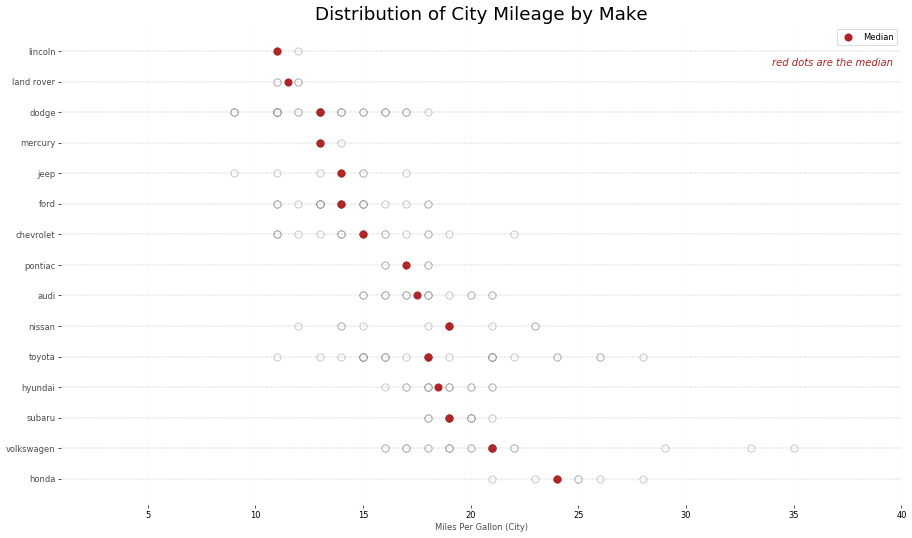

In [72]:
fig = plt.figure(figsize=(14,8),dpi=60)
ax = fig.add_axes((0,0,1.0,1.0))

# draw hlines
ax.hlines(y=df.index, xmin=0, xmax=40, 
          color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# plot scatter

for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make,:] 
    # 在每一行中绘制出该制造商所产汽车的所有里程数
    ax.scatter(y=np.repeat(i, df_make.shape[0]),x=df_make.cty,
              s=75, edgecolor='gray', c='w',alpha=.5)
    # 在每一行中绘制出该制造商所产汽车的里程中位数
    
    collect = ax.scatter(y=i, x=df_median.loc[df_median.index==make,:],
              s=75, c='firebrick')
    

# add text
ax.text(34, 13.5, 'red dots are the median',
       fontsize=12, color='firebrick',fontstyle='italic' )

# lighten borders
for spine in ax.spines.values():
    spine.set(alpha=0)

# set title
ax.set_title('Distribution of City Mileage by Make', 
             fontsize=22)

# set xlabel
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)

# set ytick
ax.yaxis.set_ticks(df.index)
ax.yaxis.set_ticklabels(df.manufacturer, ha='right', alpha=.7)

# set xlim
ax.set_xlim(1,40)

# set legend
ax.legend([collect],['Median'])
ax.grid(axis='both',alpha=.4,linewidth=.1)
plt.show()

In [69]:
ax.collections

## version II

In [73]:
# prepare data

cyl_colors = {4:'tab:cyan', 5:'tab:green', 6:'tab:olive', 8:'tab:brown'}
df_raw['cyl_colors'] = df_raw.cyl.map(cyl_colors)

df = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x:x.mean())
df.sort_values('cty',ascending=False,inplace=True)
df = df.reset_index()

df_median = df_raw[['cty','manufacturer']].groupby('manufacturer').apply(lambda x:x.median())



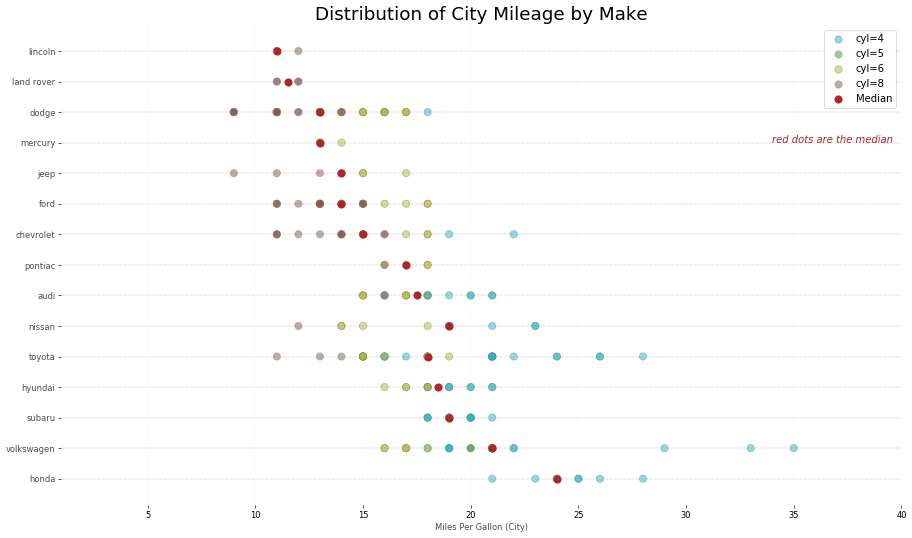

In [84]:
fig = plt.figure(figsize=(14,8),dpi=60)
ax = fig.add_axes((0,0,1.0,1.0))

# draw hlines
ax.hlines(y=df.index, xmin=0, xmax=40, 
          color='gray', alpha=0.5, linewidth=.5, linestyles='dashdot')

# plot scatter
for i, make in enumerate(df.manufacturer):
    df_make = df_raw.loc[df_raw.manufacturer==make,:] 
    # 在每一行中绘制出该制造商所产汽车的所有里程数
    ax.scatter(y=np.repeat(i, df_make.shape[0]),x=df_make.cty,
              s=75, edgecolor='gray', c=df_make.cyl_colors, alpha=.5,
               label=df_make.cyl)
    # 在每一行中绘制出该制造商所产汽车的里程中位数   
    collect = ax.scatter(y=i, x=df_median.loc[df_median.index==make,:],
              s=75, c='firebrick')
    

# add text
ax.text(34, 11, 'red dots are the median',
       fontsize=12, color='firebrick',fontstyle='italic' )

# lighten borders
for spine in ax.spines.values():
    spine.set(alpha=0)

# set title
ax.set_title('Distribution of City Mileage by Make', 
             fontsize=22)

# set xlabel
ax.set_xlabel('Miles Per Gallon (City)', alpha=0.7)

# set ytick
ax.yaxis.set_ticks(df.index)
ax.yaxis.set_ticklabels(df.manufacturer, ha='right', alpha=.7)

# set xlim
ax.set_xlim(1,40)

# set legend
handlers = []
labels = []
for cyl,color in cyl_colors.items():
    point = ax.scatter([],[],s=75,edgecolor='gray', c=color,alpha=.5)
    labels.append(f'cyl={cyl}')
    handlers.append(point)
handlers.append(collect)
labels.append('Median')
ax.legend(handlers,labels,fontsize=12)

ax.grid(axis='both',alpha=.4,linewidth=.1)
plt.show()